In [17]:
pip install --upgrade mxnet

Note: you may need to restart the kernel to use updated packages.


In [18]:
!pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

!pip install --upgrade gluoncv

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [19]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils

In [20]:
%%time
import sagemaker
import boto3, os
from sagemaker import get_execution_role
 
s3 = boto3.resource('s3')
role = get_execution_role()
print(role)
sess = sagemaker.Session()

arn:aws:iam::577523854969:role/service-role/AmazonSageMakerServiceCatalogProductsUseRole
CPU times: user 56.1 ms, sys: 0 ns, total: 56.1 ms
Wall time: 103 ms


In [21]:
bucket = 'test123-dev' ## Replace with the bucket name in your account
# prefix = 'semantic-segmentation-demo'
print(bucket)

test1004bc8623f4f4be5a1dc7673b11cefe100030-dev


In [22]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)
type(net)

gluoncv.model_zoo.rcnn.mask_rcnn.mask_rcnn.MaskRCNN

In [23]:
!aws s3 cp s3://test123-dev/public/2AE43682-BEC8-483F-956A-111797C495B5.jpg .

download: s3://test1004bc8623f4f4be5a1dc7673b11cefe100030-dev/public/2AE43682-BEC8-483F-956A-111797C495B5.jpg to ./2AE43682-BEC8-483F-956A-111797C495B5.jpg


In [32]:
im_fname = utils.download('https://st3.depositphotos.com/1017986/13921/i/1600/depositphotos_139219640-stock-photo-woman-with-basket-buying-broccoli.jpg',
                          path='brc.jpg')

#im_fname = utils.download('https://images.pexels.com/photos/42059/citrus-diet-food-fresh-42059.jpeg', path='org2.jpg')
# !aws s3 cp s3://test1123-dev/sri1.jpeg .
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

download: s3://test1004bc8623f4f4be5a1dc7673b11cefe100030-dev/sri1.jpeg to ./sri1.jpeg


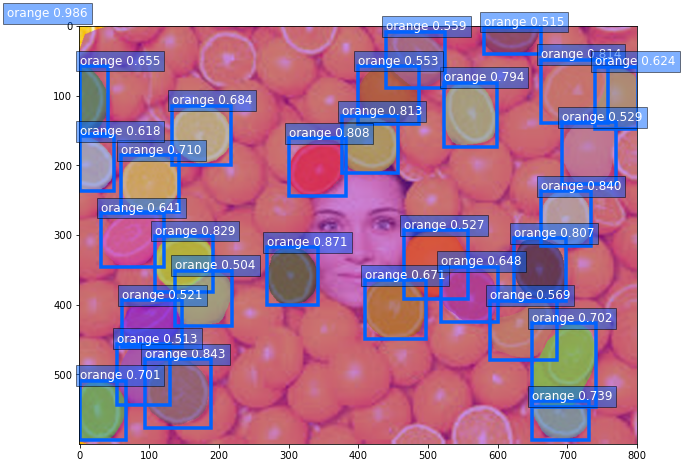

In [33]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]
#print("ids", ids)
#print("ids, scores", ids, scores)

## added this for loop to filter all broccoli scores (Work need to be done)
#for i in ids():
#    if ids[i] == 50:
#        print(ids[i],scores[i])

#print("bboxes", bboxes)
#print("masks", masks)
# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)


# plt.savefig('brc-seg.jpg',bboxes='tight', pad_inches=-0.5,orientation= 'landscape')
plt.show()

In [15]:
! aws s3 cp $im_fname s3://test1004bc8623f4f4be5a1dc7673b11cefe100030-dev/public/

upload: ./org2.jpg to s3://test1004bc8623f4f4be5a1dc7673b11cefe100030-dev/public/org2.jpg


In [16]:
import numpy as np
ids = ids[ids != -1]
#scores = scores[scores > 0.6]
#print(ids)
#print(scores)
#id_index = np.where(ids == 50)
#print (id_index)
#newids = ids[ids == 50]
#print(scores)
score_index = np.where(scores >= 0.60)
#print(score_index)
print("Total Count", np.count_nonzero(score_index))

Total Count 20
